<a href="https://colab.research.google.com/github/saikrishna-dataanalyst/1/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets


In [ ]:
import pandas as pd
data = pd.read_csv('/content/dataset.csv')
data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [ ]:
# prompt: generate a code for CHECKING MISSING VALUES & IF THERE ARE SOME DUBLICATE ROWS OR NOT

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_rows)

# Display duplicate rows (optional)
if duplicate_rows > 0:
    print("\nDuplicate rows:\n", data[data.duplicated()])


Missing values:
 timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

Number of duplicate rows: 0


CHECKING MISSING VALUES & IF THERE ARE SOME DUBLICATE ROWS OR NOT

<ipython-input-27-9055b2c1a3f5>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')  # Count plot for each feature
<ipython-input-27-9055b2c1a3f5>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')  # Count plot for each feature
<ipython-input-27-9055b2c1a3f5>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')  # Count plot for each feature
<ipython-input-27-9055b2c1a3f5>:19: FutureWarning: 

Passing `palette` without assigning `hue` is de

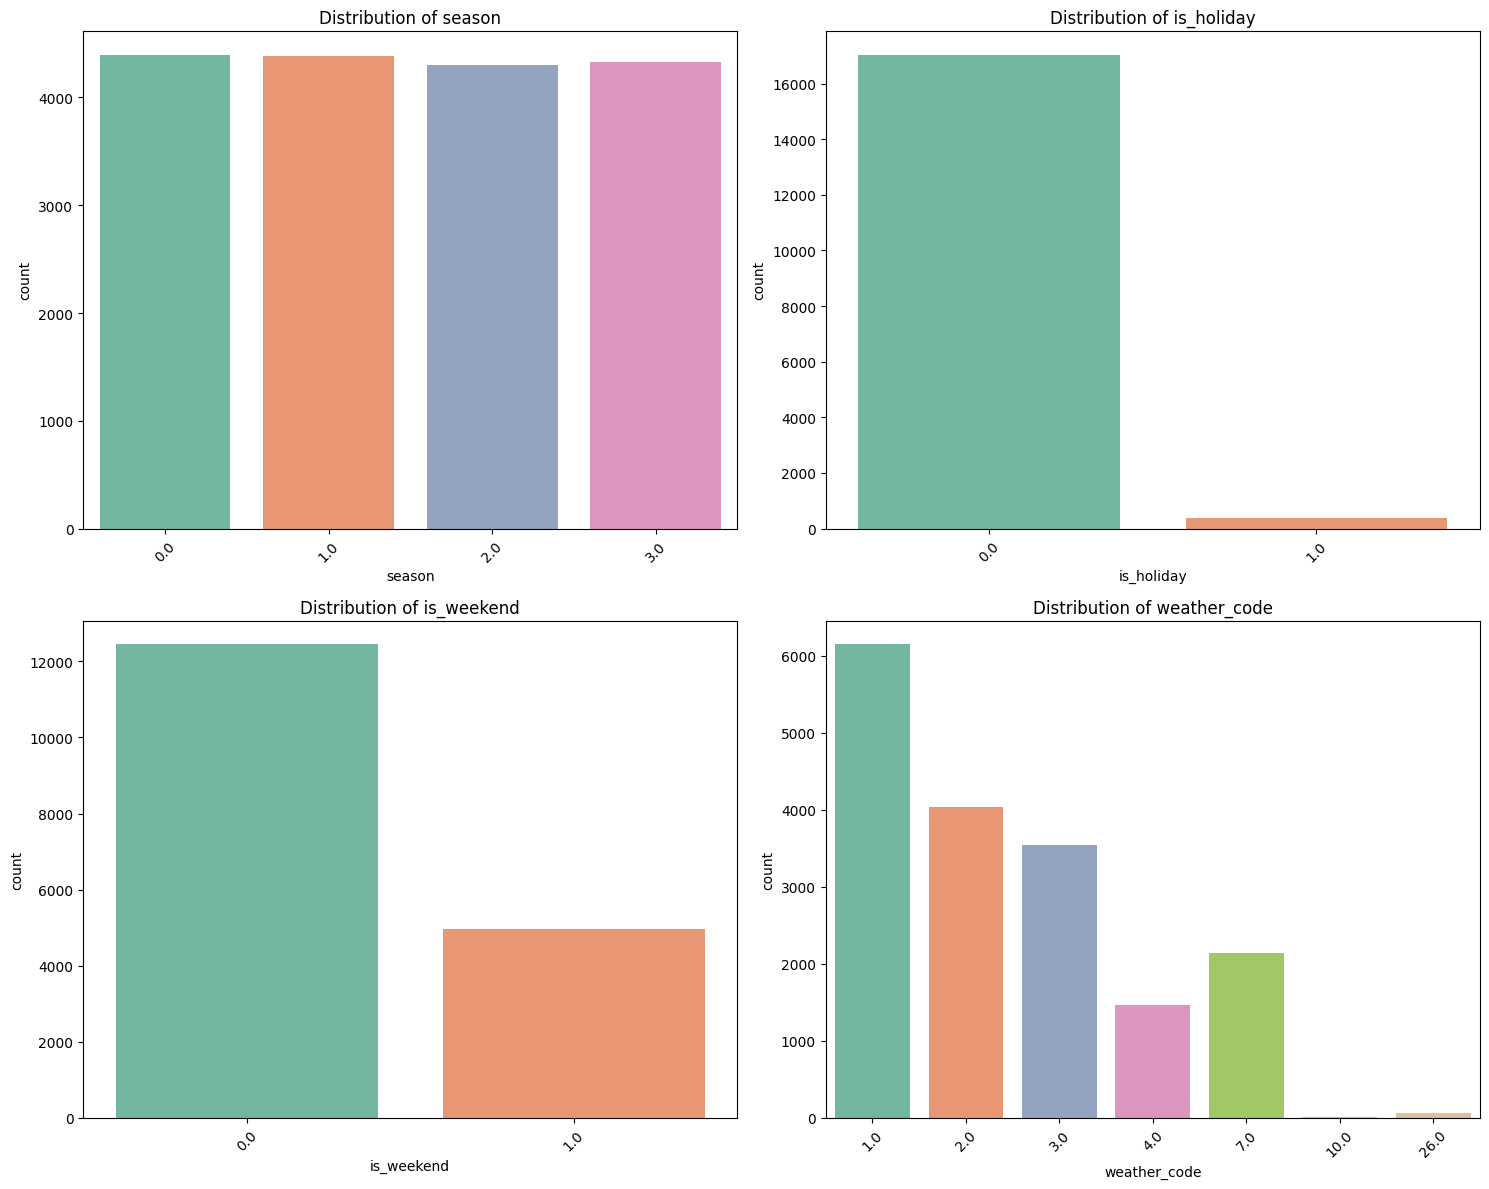

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have a DataFrame (replace with your actual data)
# df = pd.read_csv('your_data.csv')  # Load your actual dataset

# List of categorical columns to plot
# Make sure these column names match the actual column names in your DataFrame (case-sensitive)
# Check the actual column names in your DataFrame using data.columns
categorical_columns = ['season', 'is_holiday', 'is_weekend', 'weather_code']  # Changed 'weathercode' to 'weather_code'

# Set up the figure size
plt.figure(figsize=(15, 12))

# Loop through each feature and plot its distribution
for idx, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, idx)  # Create a 2x2 grid of subplots
    sns.countplot(x=col, data=data, palette='Set2')  # Count plot for each feature
    plt.title(f'Distribution of {col}')  # Title for each subplot
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better readability

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## **TASK:3** PLOTTING THE DISTRIBUTION OF VARIOUS DISCRETE FEATURES ON SEASON/HOLIDAY/WEEKEND/WEATHERCODE

In [ ]:
# prompt: generate a code for LOOKING AT THE DATA TYPES OF EACH VARIABLE, TRANSFORM TIMESTAMP IN TYPE & SET IT AS INDEX

# Check data types of each variable
print(data.dtypes)

# Convert 'timestamp' to datetime and set as index
try:
  data['timestamp'] = pd.to_datetime(data['timestamp'])
  data = data.set_index('timestamp')
  print("\nTimestamp converted to datetime and set as index successfully.")
except KeyError:
  print("\nError: 'timestamp' column not found in the DataFrame.")
except ValueError:
  print("\nError: Could not convert 'timestamp' column to datetime. Check the format.")
except Exception as e:
  print(f"\nAn unexpected error occurred: {e}")


timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

Timestamp converted to datetime and set as index successfully.


**TASK:4** LOOKING AT THE DATA TYPES OF EACH VARIABLE, TRANSFORM TIMESTAMP IN TYPE & SET IT AS INDEX

In [ ]:
# prompt: generate a code for  MAKING FEATURE ENGINEERING. EXTRACTING NEW COLUMNS (DAY OF WEEK, DAY OF MONTH, HOUR, MONTH, SEASON, YEAR ETC.

# Feature Engineering: Extracting new columns from the timestamp

# Assuming 'timestamp' is already converted to datetime and set as index (from Task 4)

try:
    data['day_of_week'] = data.index.dayofweek
    data['day_of_month'] = data.index.day
    data['hour'] = data.index.hour
    data['month'] = data.index.month
    data['season'] = (data.index.month%12 + 3)//3  # Assuming seasons are defined by months
    data['year'] = data.index.year

    print("\nNew features (day_of_week, day_of_month, hour, month, season, year) created successfully.")
    print(data.head()) # Display first few rows with new columns
except Exception as e:
    print(f"\nAn error occurred during feature engineering: {e}")

#Further feature engineering based on your needs can be added here
#Example:
#Creating a 'time_of_day' feature
#data['time_of_day'] = pd.cut(data['hour'], bins=[0,6,12,18,24], labels=['Night','Morning','Afternoon','Evening'], right = False)



New features (day_of_week, day_of_month, hour, month, season, year) created successfully.
                     cnt   t1   t2    hum  wind_speed  weather_code  \
timestamp                                                             
2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

                     is_holiday  is_weekend  season  day_of_week  \
timestamp                                                          
2015-01-04 00:00:00         0.0         1.0       1            6   
2015-01-04 01:00:00         0.0         1.0       1            6   
2015-01-04 02:00:00         0.0         1.0       1            6   
2015-01-04 03:00:00         0.0         1.0       1            6   
201

**TASK:5** MAKING FEATURE ENGINEERING. EXTRACTING NEW COLUMNS (DAY OF WEEK, DAY OF MONTH, HOUR, MONTH, SEASON, YEAR ETC.

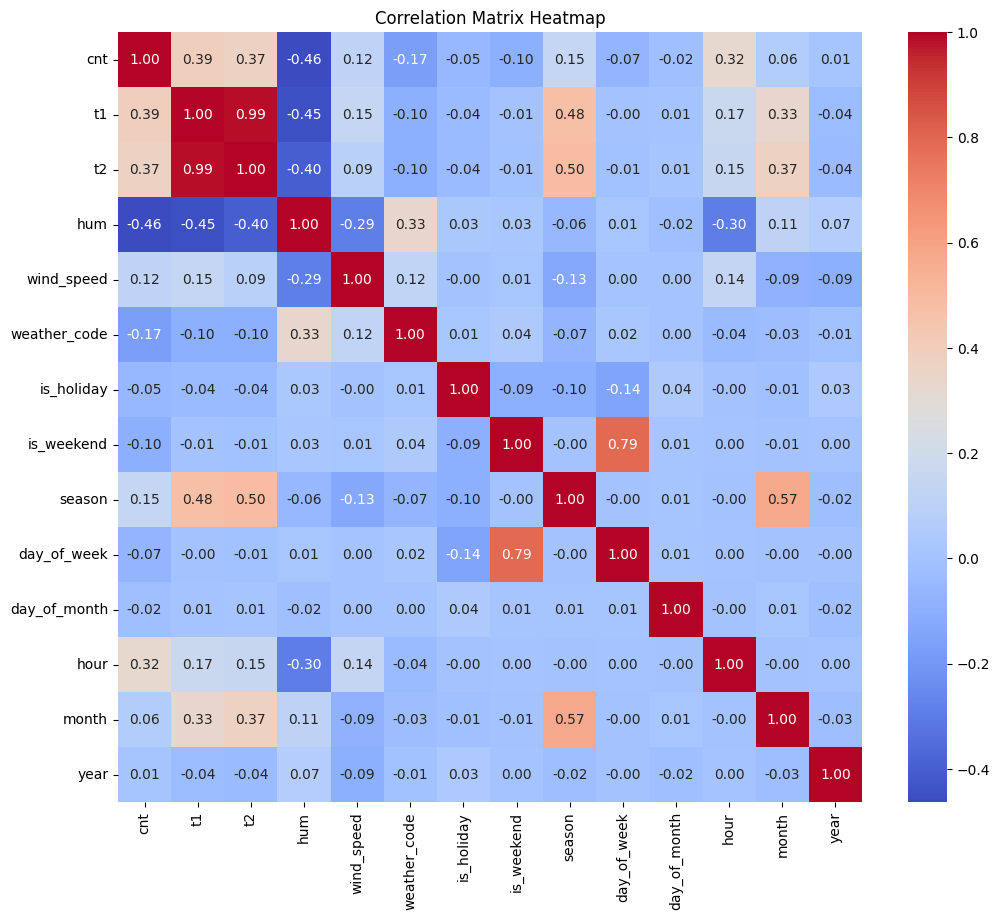

In [ ]:
# prompt: generate a code for VISUALIZING THE CORRELATION WITH A HEATMAP

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


**TASK:6** VISUALIZING THE CORRELATION WITH A HEATMAP

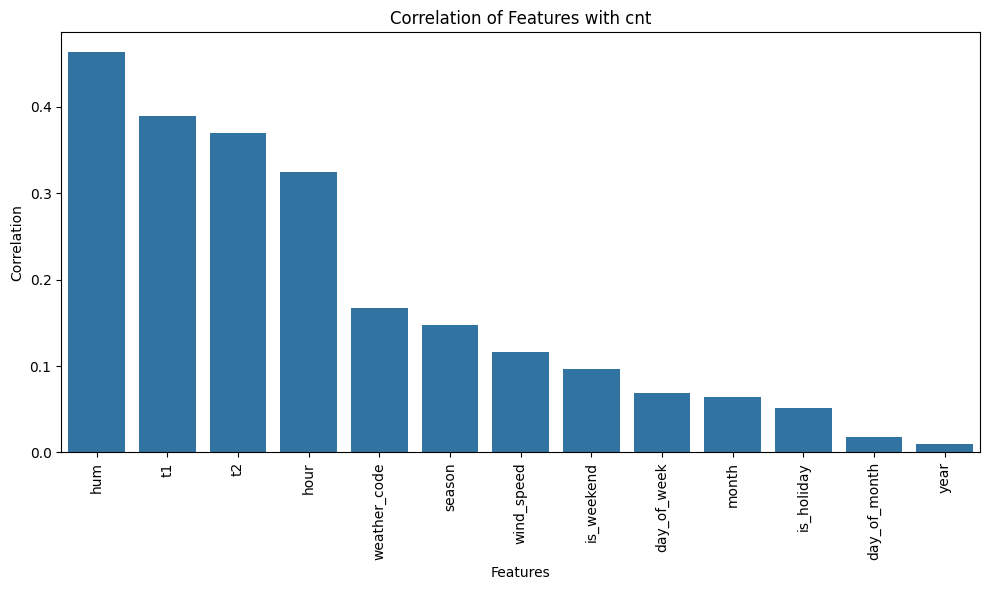

In [ ]:
# prompt: generate a code for VISUALIZING THE CORRELATION OF THE TARGET VARIABLE & THE OTHER FEATURES WITH BARPLO

# **TASK:7** VISUALIZING THE CORRELATION OF THE TARGET VARIABLE & THE OTHER FEATURES WITH BARPLOT

# Assuming 'cnt' is your target variable
target_variable = 'cnt'

# Calculate correlations with the target variable
correlations = data.corr()[target_variable].drop(target_variable)  # Exclude self-correlation

# Sort correlations by magnitude
sorted_correlations = correlations.abs().sort_values(ascending=False)

# Create a bar plot of the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_correlations.index, y=sorted_correlations.values)
plt.xticks(rotation=90)
plt.title(f'Correlation of Features with {target_variable}')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.tight_layout()  # Adjust layout for better readability
plt.show()


**TASK:7** VISUALIZING THE CORRELATION OF THE TARGET VARIABLE & THE OTHER FEATURES WITH BARPLO

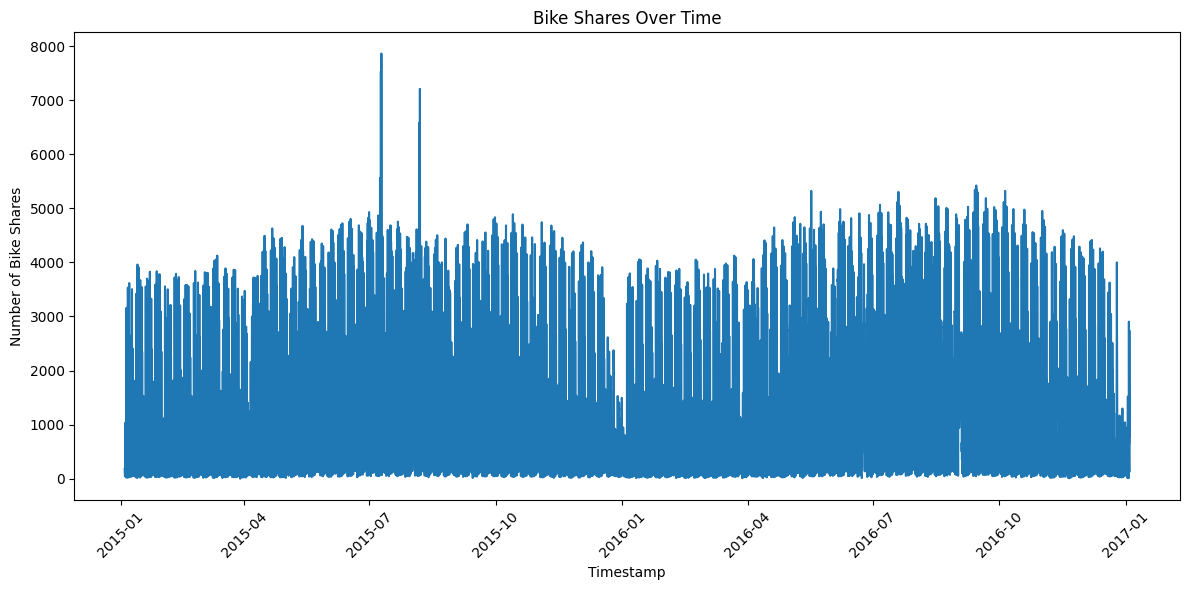

In [ ]:
# prompt: generate a code for   PLOTTING BIKE SHARES OVER TIME BY USING LINEPLOT

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame is already loaded and processed as in the previous code

plt.figure(figsize=(12, 6))
sns.lineplot(x=data.index, y='cnt', data=data)  # Assuming 'cnt' represents bike shares
plt.title('Bike Shares Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Number of Bike Shares')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**TASK:8** PLOTTING BIKE SHARES OVER TIME BY USING LINEPLOT

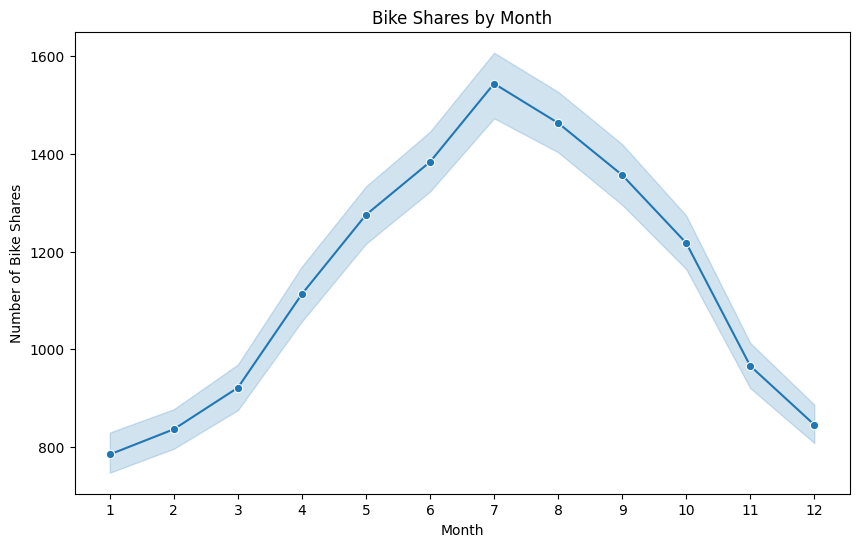

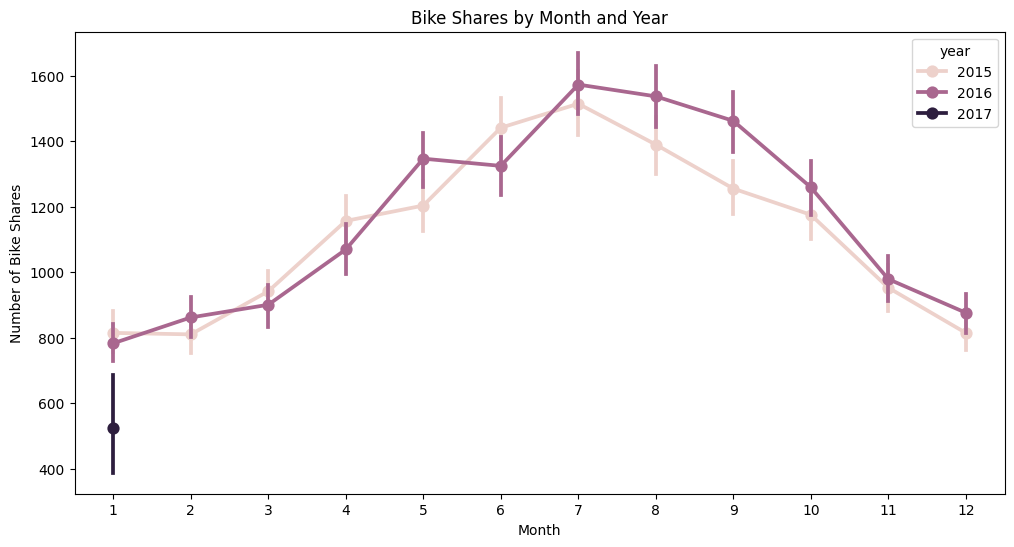

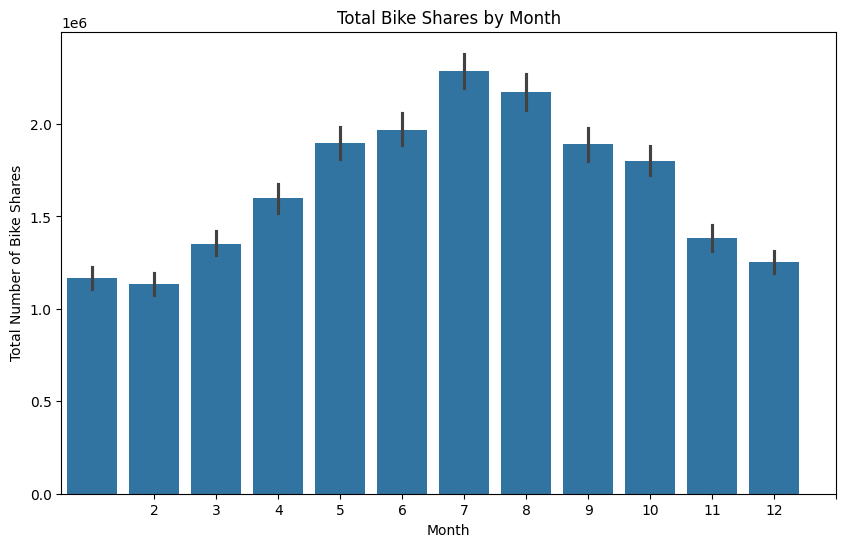

In [ ]:
# prompt: generate a code for PLOTTING BIKE SHARES BY MONTHS & YEAR_OF_MONTH (USE LINEPLOT, POINTPOT, BARPLOT)

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame is already loaded and processed as in the previous code
# and contains 'month' and 'year' columns (from Task 5)

# Plotting bike shares by month
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='cnt', data=data, marker='o') # Lineplot with points
plt.title('Bike Shares by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bike Shares')
plt.xticks(range(1,13)) # Ensure all months are displayed
plt.show()


# Plotting bike shares by year and month (combined)
plt.figure(figsize=(12,6))
sns.pointplot(x='month', y='cnt', hue='year', data=data)
plt.title('Bike Shares by Month and Year')
plt.xlabel('Month')
plt.ylabel('Number of Bike Shares')
plt.show()


# Plotting bike shares by month as a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='cnt', data=data, estimator=sum) # Summing bike shares for each month
plt.title('Total Bike Shares by Month') #Changed title to reflect the aggregation
plt.xlabel('Month')
plt.ylabel('Total Number of Bike Shares')
plt.xticks(range(1,13)) # Ensure all months are displayed
plt.show()


**TASK:9** PLOTTING BIKE SHARES BY MONTHS & YEAR_OF_MONTH (USE LINEPLOT, POINTPOT, BARPLOT)

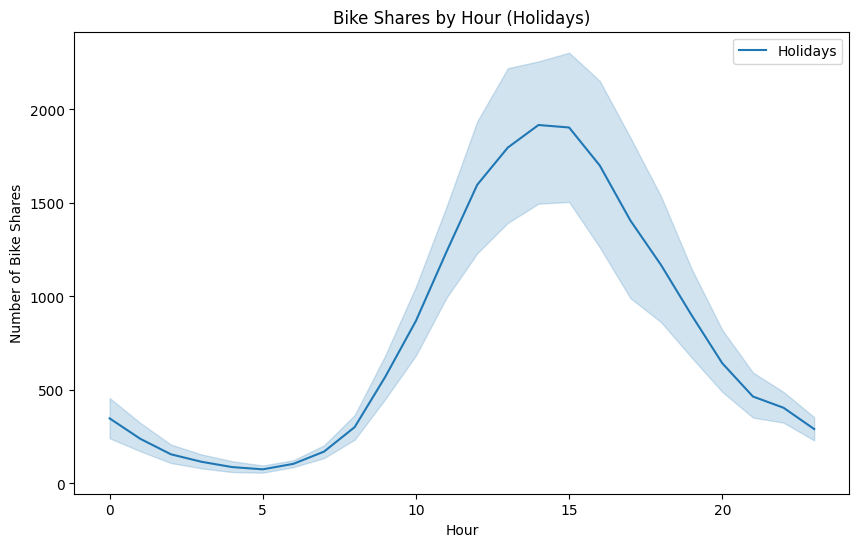

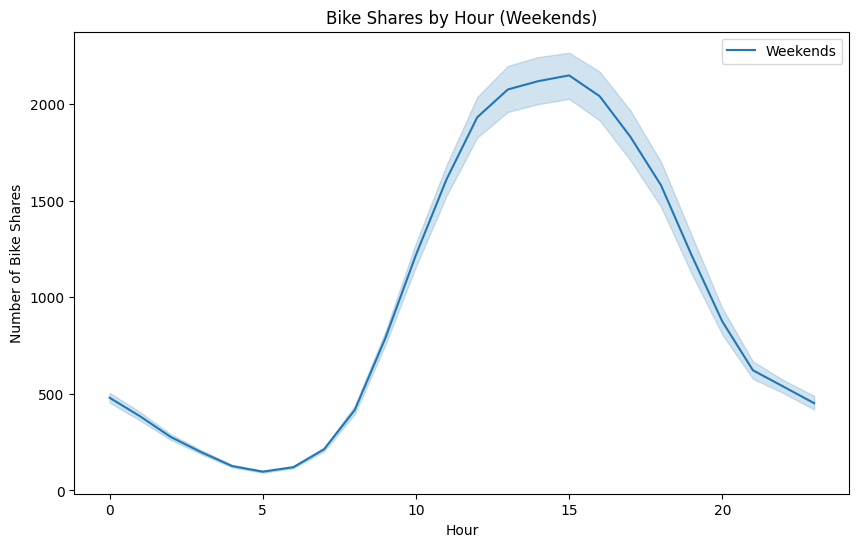

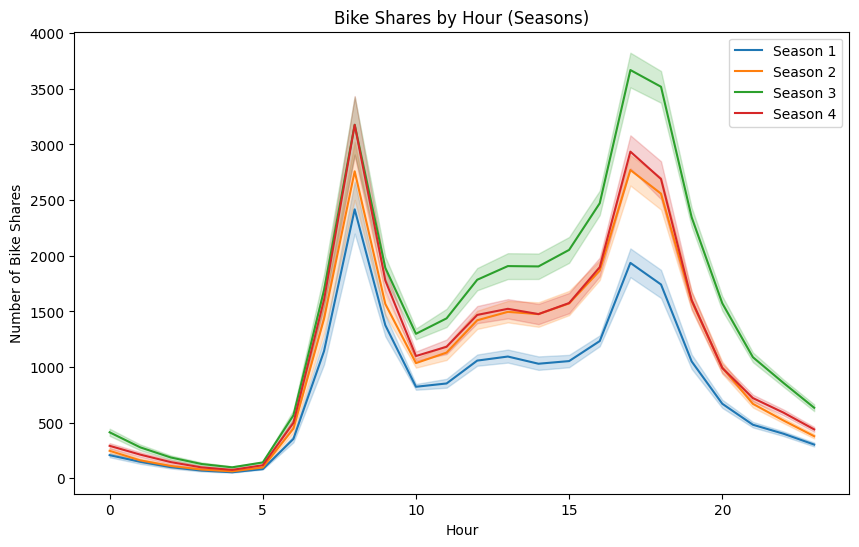

In [ ]:
# prompt: generate a code for PLOTTING BIKE SHARES BY HOURS ON (HOLIDAYS, WEEKEND, SEASON)

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame is already loaded and processed as in the previous code
# and contains 'hour', 'is_holiday', 'is_weekend', and 'season' columns

# Plotting bike shares by hour for holidays
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='cnt', data=data[data['is_holiday'] == 1], label='Holidays')
plt.title('Bike Shares by Hour (Holidays)')
plt.xlabel('Hour')
plt.ylabel('Number of Bike Shares')
plt.show()

# Plotting bike shares by hour for weekends
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='cnt', data=data[data['is_weekend'] == 1], label='Weekends')
plt.title('Bike Shares by Hour (Weekends)')
plt.xlabel('Hour')
plt.ylabel('Number of Bike Shares')
plt.show()

# Plotting bike shares by hour for each season
plt.figure(figsize=(10, 6))
for season in data['season'].unique():
    sns.lineplot(x='hour', y='cnt', data=data[data['season'] == season], label=f'Season {season}')
plt.title('Bike Shares by Hour (Seasons)')
plt.xlabel('Hour')
plt.ylabel('Number of Bike Shares')
plt.show()


**TASK:10** PLOTTING BIKE SHARES BY HOURS ON (HOLIDAYS, WEEKEND, SEASON)

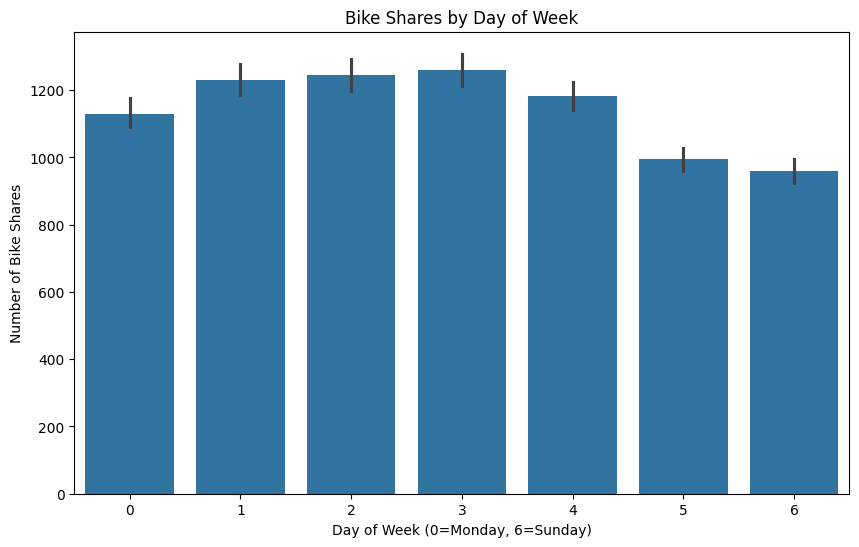

In [ ]:
# prompt: generate a code for PLOTTING BIKE SHARES BY DAY OF WEEK

# Plotting bike shares by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='cnt', data=data)
plt.title('Bike Shares by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Bike Shares')
plt.show()


**TASK:11** PLOTTING BIKE SHARES BY DAY OF WEEK

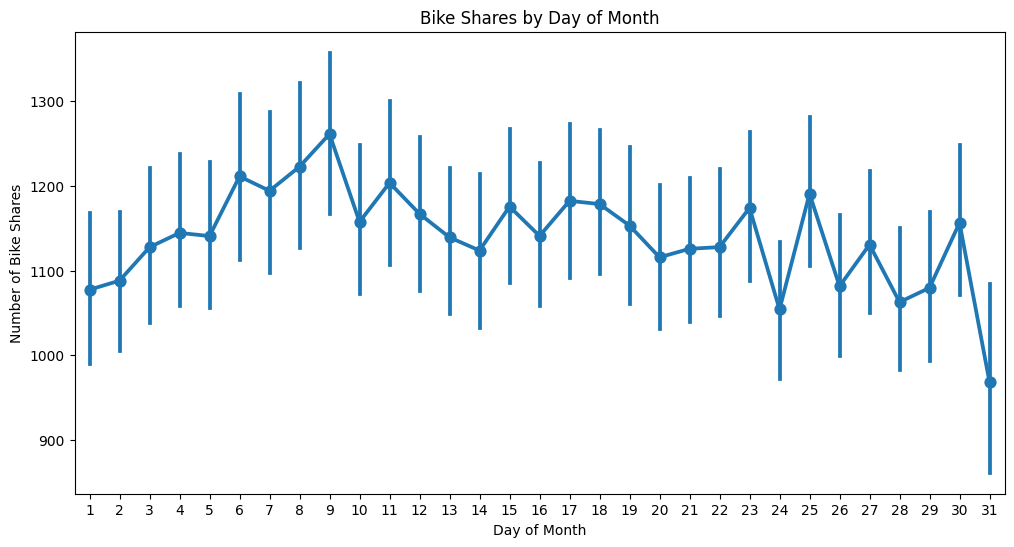

In [ ]:
# prompt: generate a code for PLOTTING BIKE SHARES BY DAY OF MONTH

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame is already loaded and processed
# and contains 'day_of_month' and 'cnt' columns

plt.figure(figsize=(12, 6))
sns.pointplot(x='day_of_month', y='cnt', data=data)
plt.title('Bike Shares by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Number of Bike Shares')
plt.show()


**TASK:12** PLOTTING BIKE SHARES BY DAY OF MONTH

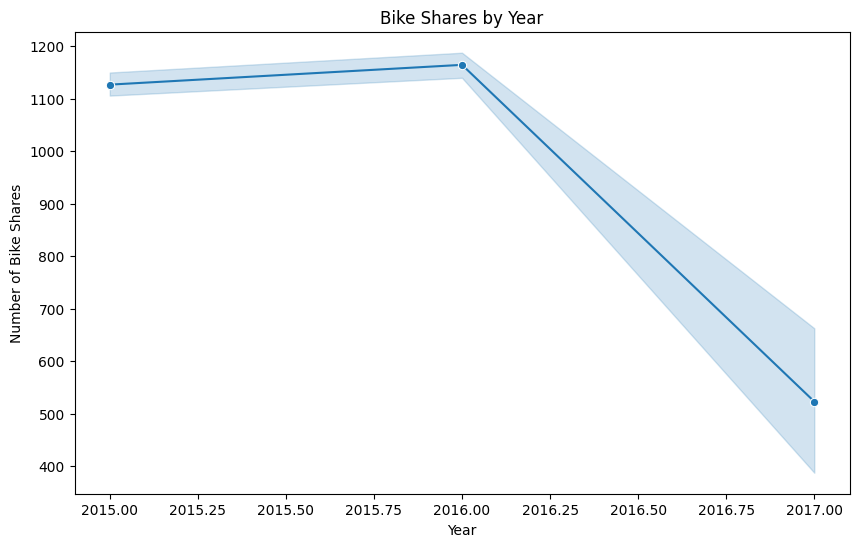

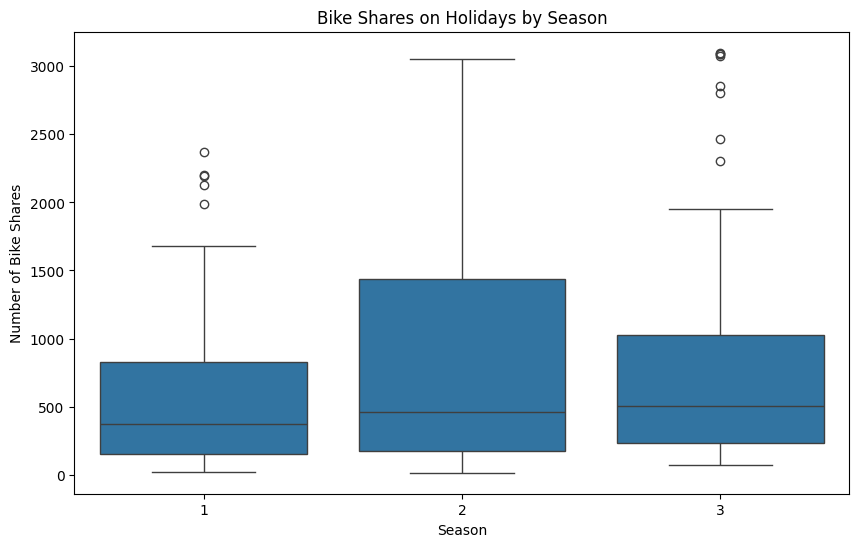

In [ ]:
# prompt: generate a code for PLOTTING BIKE SHARES BY YEAR & PLOTTING BIKE SHARES ON HOLIDAYS BY SEASON

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' DataFrame is already loaded and processed as in the previous code
# and contains 'year', 'month', 'is_holiday', 'season', and 'cnt' columns


# Plotting bike shares by year
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='cnt', data=data, marker='o')
plt.title('Bike Shares by Year')
plt.xlabel('Year')
plt.ylabel('Number of Bike Shares')
plt.show()


# Plotting bike shares on holidays by season
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=data[data['is_holiday'] == 1])
plt.title('Bike Shares on Holidays by Season')
plt.xlabel('Season')
plt.ylabel('Number of Bike Shares')
plt.show()


**TASK:13** PLOTTING BIKE SHARES BY YEAR & PLOTTING BIKE SHARES ON HOLIDAYS BY SEASON

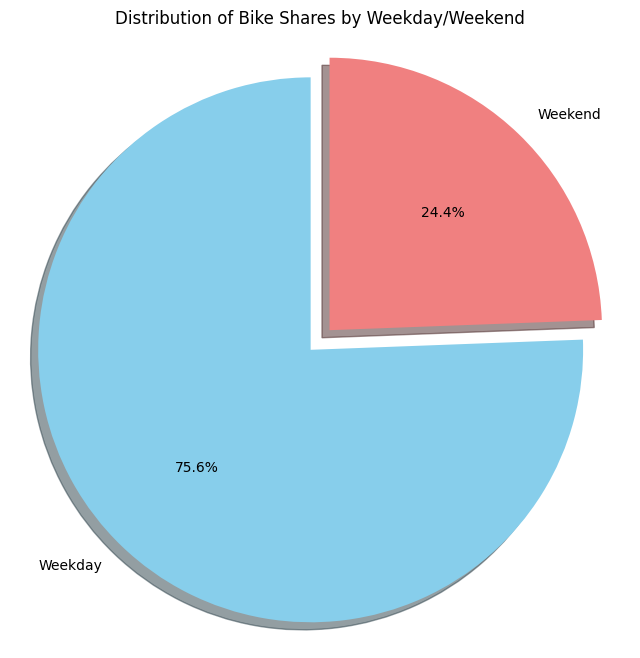

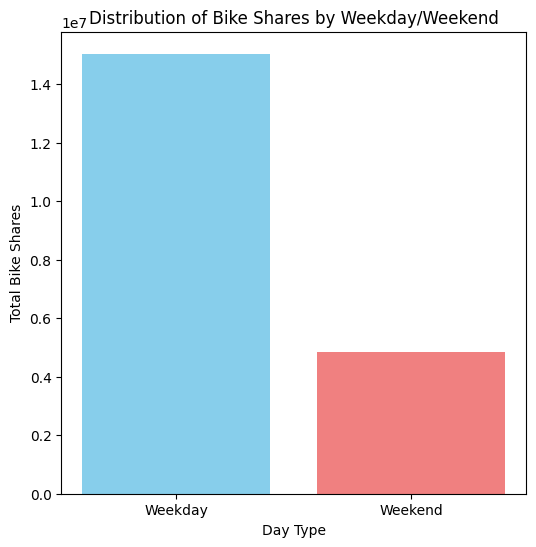

In [ ]:
# prompt: generate a code for VISUALIZING THE DISTRIBUTION OF BIKE SHARES BY WEEKDAY-WEEKEND WITH USING PIECHART & BARPLOT

import matplotlib.pyplot as plt

# Assuming 'data' DataFrame is already loaded and processed
# and contains 'is_weekend' and 'cnt' columns

# Calculate total bike shares for weekdays and weekends
weekday_shares = data[data['is_weekend'] == 0]['cnt'].sum()
weekend_shares = data[data['is_weekend'] == 1]['cnt'].sum()

# Create a pie chart
labels = ['Weekday', 'Weekend']
sizes = [weekday_shares, weekend_shares]
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)  # Explode the 1st slice (Weekday)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Distribution of Bike Shares by Weekday/Weekend')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# Create a bar plot
plt.figure(figsize=(6, 6))
plt.bar(labels, sizes, color=colors)
plt.title('Distribution of Bike Shares by Weekday/Weekend')
plt.xlabel('Day Type')
plt.ylabel('Total Bike Shares')
plt.show()


**TASK:14** VISUALIZING THE DISTRIBUTION OF BIKE SHARES BY WEEKDAY-WEEKEND WITH USING PIECHART & BARPLOT

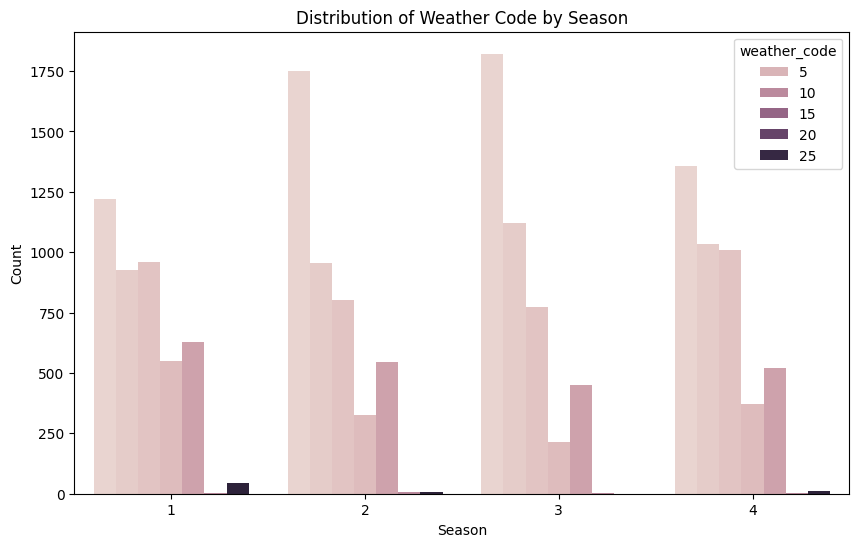

In [ ]:
# prompt: generate a code for  PLOTTING THE DISTRIBUTION OF WEATHER CODE BY SEASON

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' DataFrame is already loaded and processed
# and contains 'season' and 'weather_code' columns

plt.figure(figsize=(10, 6))
sns.countplot(x='season', hue='weather_code', data=data)
plt.title('Distribution of Weather Code by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()




**TASK:15** PLOTTING THE DISTRIBUTION OF WEATHER CODE BY SEASON